In [122]:
pip install tvb


In [123]:
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [124]:
white_matter_coupling = coupling.Difference(a=numpy.array([0.014]))

In [125]:
heunint = integrators.HeunStochastic(
    dt=2**-4,
    noise=noise.Additive(nsig=numpy.array([2 ** -5, ]))
)

In [126]:
white_matter = connectivity.Connectivity.from_file('/content/connectivity_76.zip')

In [127]:
oscillator = models.Generic2dOscillator(a=numpy.array([0.1]), tau=numpy.array([2.0]))

In [128]:
loaded_array = np.load("/content/projection_data.npy")

In [129]:
from tvb.datatypes.region_mapping import RegionMapping
from tvb.datatypes.projections import ProjectionMatrix, ProjectionSurfaceEEG
from tvb.datatypes.sensors import SensorsEEG

In [130]:
rm = RegionMapping.from_file('regionMapping_16k_76.txt')
sensorsEEG = SensorsEEG.from_file('eeg_unitvector_63.txt')
prEEG = ProjectionSurfaceEEG(projection_data=loaded_array)


2024-03-17 05:40:31,728 - ERROR - tvb.basic.readers - Could not import tvb_data Python module for default data-set!
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tvb/basic/readers.py", line 222, in try_get_absolute_path
    module_import = importlib.import_module(relative_module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 992, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module name

In [131]:
fsamp = 1e3/1024.0

mons = (
    monitors.EEG(sensors=sensorsEEG, projection=prEEG, region_mapping=rm, period=fsamp),

    monitors.ProgressLogger(period=100.0),
)

In [132]:
sim=simulator.Simulator(
    coupling=white_matter_coupling,
    integrator=heunint,
    connectivity=white_matter,
    model=oscillator,
    monitors=mons
)

In [133]:
sim.configure()

2024-03-17 05:40:39,530 - INFO - tvb.simulator.monitors - Projection configured gain shape (63, 76)


In [134]:
result=sim.run()

2024-03-17 05:40:41,895 - INFO - tvb.simulator.monitors - step 1 time 0.0001 s
2024-03-17 05:40:42,416 - INFO - tvb.simulator.monitors - step 1601 time 0.1001 s
2024-03-17 05:40:42,926 - INFO - tvb.simulator.monitors - step 3201 time 0.2001 s
2024-03-17 05:40:43,432 - INFO - tvb.simulator.monitors - step 4801 time 0.3001 s
2024-03-17 05:40:43,951 - INFO - tvb.simulator.monitors - step 6401 time 0.4001 s
2024-03-17 05:40:44,472 - INFO - tvb.simulator.monitors - step 8001 time 0.5001 s
2024-03-17 05:40:44,981 - INFO - tvb.simulator.monitors - step 9601 time 0.6001 s
2024-03-17 05:40:45,494 - INFO - tvb.simulator.monitors - step 11201 time 0.7001 s
2024-03-17 05:40:46,023 - INFO - tvb.simulator.monitors - step 12801 time 0.8001 s
2024-03-17 05:40:46,515 - INFO - tvb.simulator.monitors - step 14401 time 0.9001 s


In [135]:
result

[(array([4.6875000e-01, 1.4062500e+00, 2.3437500e+00, ..., 9.9703125e+02,
         9.9796875e+02, 9.9890625e+02]),
  array([[[[ -8678.82448661],
           [  3534.40605895],
           [ 47182.7010331 ],
           ...,
           [ -5204.42659258],
           [ 24991.54162137],
           [ 20730.11599219]]],
  
  
         [[[ -5437.90892658],
           [  3005.00825836],
           [ 43272.64570166],
           ...,
           [ -4855.12872704],
           [ 24620.10340244],
           [ 20088.44322015]]],
  
  
         [[[ -4784.81654049],
           [  2758.04247041],
           [ 37534.05880522],
           ...,
           [ -3958.88861578],
           [ 23222.3999159 ],
           [ 20444.09196258]]],
  
  
         ...,
  
  
         [[[   614.79176065],
           [-20196.46600838],
           [ -8743.78264681],
           ...,
           [-12056.91102877],
           [ 17981.02525056],
           [ 19213.36659415]]],
  
  
         [[[  3296.6672868 ],
           [-19000.

In [136]:
data=result[0][1]

In [137]:
data.shape

(1066, 1, 63, 1)

In [138]:
data_ndarray=np.array(data)

In [139]:
data_ndarray=np.squeeze(data_ndarray)

In [140]:
data_ndarray.shape

(1066, 63)

In [141]:
data_ndarray

array([[ -8678.82448661,   3534.40605895,  47182.7010331 , ...,
         -5204.42659258,  24991.54162137,  20730.11599219],
       [ -5437.90892658,   3005.00825836,  43272.64570166, ...,
         -4855.12872704,  24620.10340244,  20088.44322015],
       [ -4784.81654049,   2758.04247041,  37534.05880522, ...,
         -3958.88861578,  23222.3999159 ,  20444.09196258],
       ...,
       [   614.79176065, -20196.46600838,  -8743.78264681, ...,
        -12056.91102877,  17981.02525056,  19213.36659415],
       [  3296.6672868 , -19000.90221235,  -7808.67291958, ...,
         -9812.76649916,  19178.97712372,  17872.1709377 ],
       [  7995.01094854, -16971.39488724,  -9460.66744814, ...,
         -6614.69217071,  20381.60899799,  17168.66727846]])

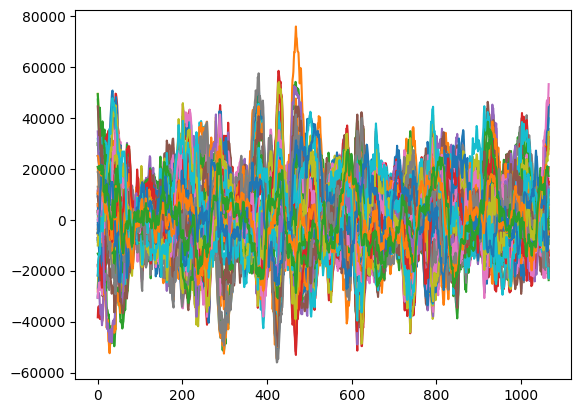

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data_ndarray)
plt.show()